# Question 1

### 1. Are there significant differences in the physical exercise among different groups in the United States?

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('final_sample.csv')
data.info(), data.head()

exercise_summary = data['X_pastae1'].value_counts()
exercise_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Columns: 330 entries, X_state to X_age80
dtypes: float64(100), object(230)
memory usage: 45.3+ MB


Did not meet both guidelines    13907
Met both guidelines              2731
unknown                          1362
Name: X_pastae1, dtype: int64

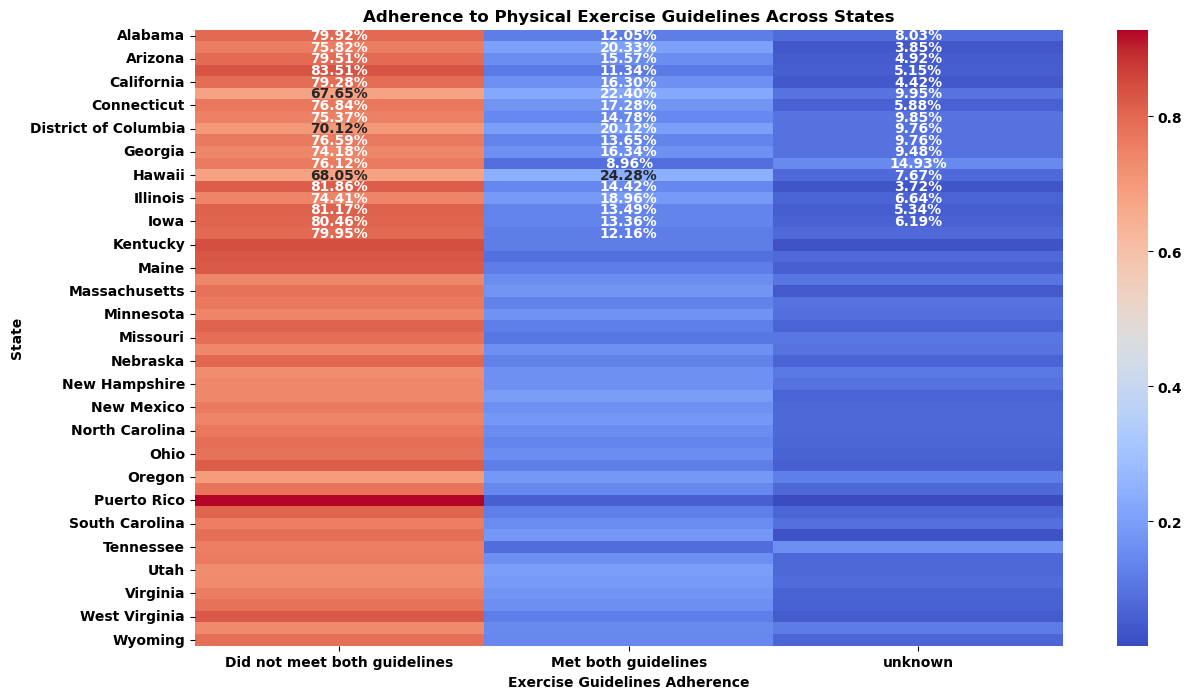

In [27]:
# Data preparation for visualization
state_exercise = data.groupby('X_state')['X_pastae1'].value_counts(normalize=True).unstack().fillna(0)

# Resetear el índice para que 'X_state' sea una columna y no un índice
state_exercise = state_exercise.reset_index()

plt.figure(figsize=(14, 8))
sns.heatmap(state_exercise.set_index('X_state'), annot=True, cmap='coolwarm', fmt=".2%")
plt.title('Adherence to Physical Exercise Guidelines Across States')
plt.ylabel('State')
plt.xlabel('Exercise Guidelines Adherence')
plt.show()

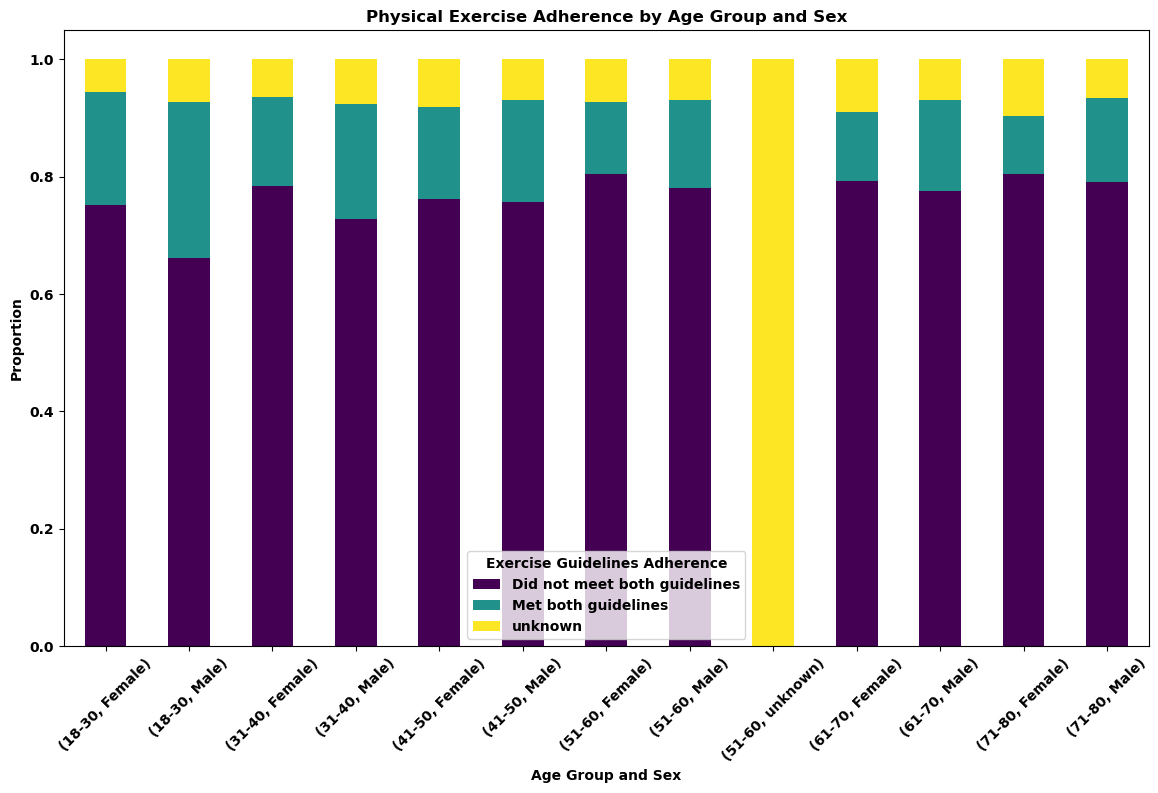

In [7]:
# Categorizing age data into groups
data['age_group'] = pd.cut(data['X_age80'],
                           bins=[17, 30, 40, 50, 60, 70, 80, 100],
                           labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'])

# Creating a cross-tabulation of age group and exercise adherence
age_exercise = pd.crosstab(index=[data['age_group'], data['sex']], columns=data['X_pastae1'], normalize='index')

age_exercise_plot = age_exercise.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Physical Exercise Adherence by Age Group and Sex')
plt.xlabel('Age Group and Sex')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Exercise Guidelines Adherence')
plt.show()
